In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [56]:
df=pd.read_csv('Salary_Data.csv')

In [57]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [58]:
X=df['YearsExperience'].values
Y=df['Salary'].values

In [59]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [60]:
Y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [61]:
import math
def cost_func(x, y, w, b):
    
    ypred = w * x + b
    
    m = x.shape[0]
    cost = (1/(2*m)) * np.sum((ypred - y)**2)
    return cost, ypred

def compute_gradient_descent(x, y, w, b, learning_rate=0.001, iterations=10000):
    costdata = []
    wdata = []
    bdata = []
    
    for i in range(iterations):
        cost, ypred = cost_func(x, y, w, b)
        costdata.append(cost)
        m = x.shape[0]
        
        
        dw = (1/m) * np.sum((ypred - y) * x)
        db = (1/m) * np.sum(ypred - y)
        
      
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        wdata.append(w)
        bdata.append(b)
        
        if i % math.ceil(iterations / 10) == 0:
            print(f"Iteration {i}: Cost = {cost}, W = {w}, b = {b}")
    
    return w, b, costdata, wdata, bdata

In [62]:
w,b,costdata,wdata,bdata=compute_gradient_descent(X,Y,0,0)

Iteration 0: Cost = 3251477635.366667, W = 477.3987, b = 76.003
Iteration 1000: Cost = 55957391.814032435, W = 12315.49908085564, b = 6482.1085369143675
Iteration 2000: Cost = 42047073.989913225, W = 11769.133174593406, b = 10163.923364858923
Iteration 3000: Cost = 32935559.431841023, W = 11326.941714024972, b = 13143.734252857339
Iteration 4000: Cost = 26967349.460533675, W = 10969.061975266532, b = 15555.390825274097
Iteration 5000: Cost = 23058061.92830267, W = 10679.418418493255, b = 17507.221878280205
Iteration 6000: Cost = 20497406.541992795, W = 10445.000593468243, b = 19086.901382838023
Iteration 7000: Cost = 18820130.068114284, W = 10255.278725315413, b = 20365.386697064743
Iteration 8000: Cost = 17721483.06357514, W = 10101.73072933192, b = 21400.10588787359
Iteration 9000: Cost = 17001849.026264768, W = 9977.45940889796, b = 22237.537332657732


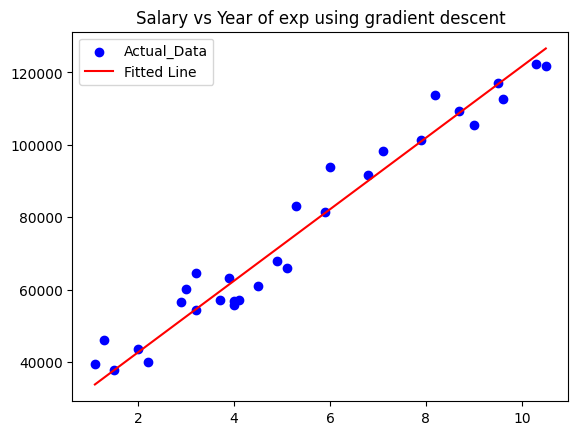

In [63]:
ypredgradient=b+w*X
plt.scatter(X,Y,color='blue',label='Actual_Data')
plt.plot(X,ypredgradient,color='red',label='Fitted Line')
plt.title('Salary vs Year of exp using gradient descent')
plt.legend()
plt.show()

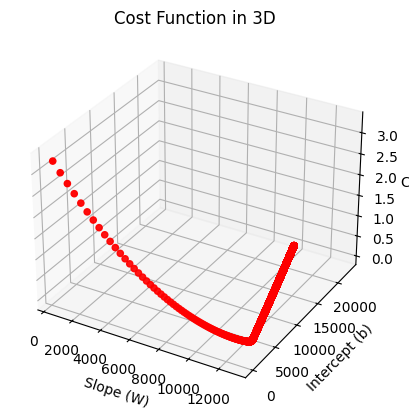

In [64]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(wdata,bdata,costdata,c='r',marker='o')
ax.set_xlabel('Slope (W)')
ax.set_ylabel('Intercept (b)')
ax.set_zlabel('Cost')
    
plt.title('Cost Function in 3D')
plt.show()


In [65]:
from sklearn.metrics import mean_squared_error,r2_score
gradient_mse=mean_squared_error(Y,ypredgradient)
gradientr2=r2_score(Y,ypredgradient)



In [66]:
## Prediction using Sklearn 
## First we Have to reshape
Xreshape=X.reshape(-1,1)
print(Xreshape.shape)
reg=LinearRegression().fit(Xreshape,Y)
Ypredsk=reg.predict(Xreshape)


(30, 1)


array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

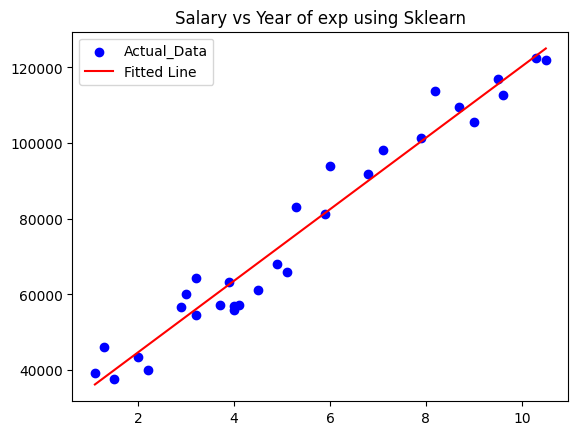

In [67]:
plt.scatter(X,Y,color='blue',label='Actual_Data')
plt.plot(X,Ypredsk,color='red',label='Fitted Line')
plt.title('Salary vs Year of exp using Sklearn')
plt.legend()
plt.show()

In [68]:
wsklearn=reg.coef_[0]
wsklearn

9449.962321455074

In [69]:
bsklearn=reg.intercept_
bsklearn

25792.20019866871

In [70]:
print(f"Mean Square Error Using Sklearn {mean_squared_error(y,Ypredsk)}\nMean Square Error Using Gradient Descent {gradient_mse}")
print(f"R2 Score  Using Gradient Descent {gradientr2}")
print(f" Sklearn R2 Score {r2_score(Y,Ypredsk)}")

Mean Square Error Using Formula 31270951.72228096
Mean Square Error Using Gradient Descent 33060950.93627482
R2 Score  Using Gradient Descent 0.9569566641435086
 Sklearn R2 Score 0.9569566641435086
